In [35]:
import meep as mp
import matplotlib.pyplot as plt
import numpy as np

In [36]:
cell_size = (1,1,0)

boundary_layer = [
    mp.PML(0.3, mp.X),
    mp.PML(0.3, mp.Y)
                  ]

In [ ]:
resolution = 100
nfreq = 100

lambda_min = 0.4
lambda_max = 0.7

fmin = 1 / lambda_max
fmax = 1 / lambda_min

fcen = 1.75
df=3.3

In [48]:
source_center = mp.Vector3(0,0,0)
sources = [mp.Source(
    src=mp.GaussianSource(frequency=fcen, fwidth=df),
    component=mp.Ey,
    center=source_center,
    size=mp.Vector3(0,0)
)]

In [50]:
sim = mp.Simulation(
    cell_size=cell_size,
    default_material=mp.Medium(index=1),
    boundary_layers=boundary_layer,
    sources=sources,
    resolution=resolution
)

In [51]:
offset = 0.01
flux_size = 0.02
source_center = mp.Vector3(0,0,0)

box_power = sim.add_flux(
    fcen, df, nfreq,
    mp.FluxRegion(center=source_center - mp.Vector3(offset, 0, 0),
                  size=mp.Vector3(0, flux_size),
                  # direction=mp.Y, 
                  weight=-1),
    mp.FluxRegion(center=source_center + mp.Vector3(offset, 0, 0),
                  size=mp.Vector3(0, flux_size),
                  # direction=mp.Y
                ),
    mp.FluxRegion(center=source_center - mp.Vector3(0, offset, 0),
                  size=mp.Vector3(flux_size, 0),
                  # direction=mp.Y, 
                  weight=-1),
    mp.FluxRegion(center=source_center + mp.Vector3(0, offset, 0),
                  size=mp.Vector3(flux_size, 0),
                  # direction=mp.Y
                  )
)

<Axes: xlabel='X', ylabel='Y'>

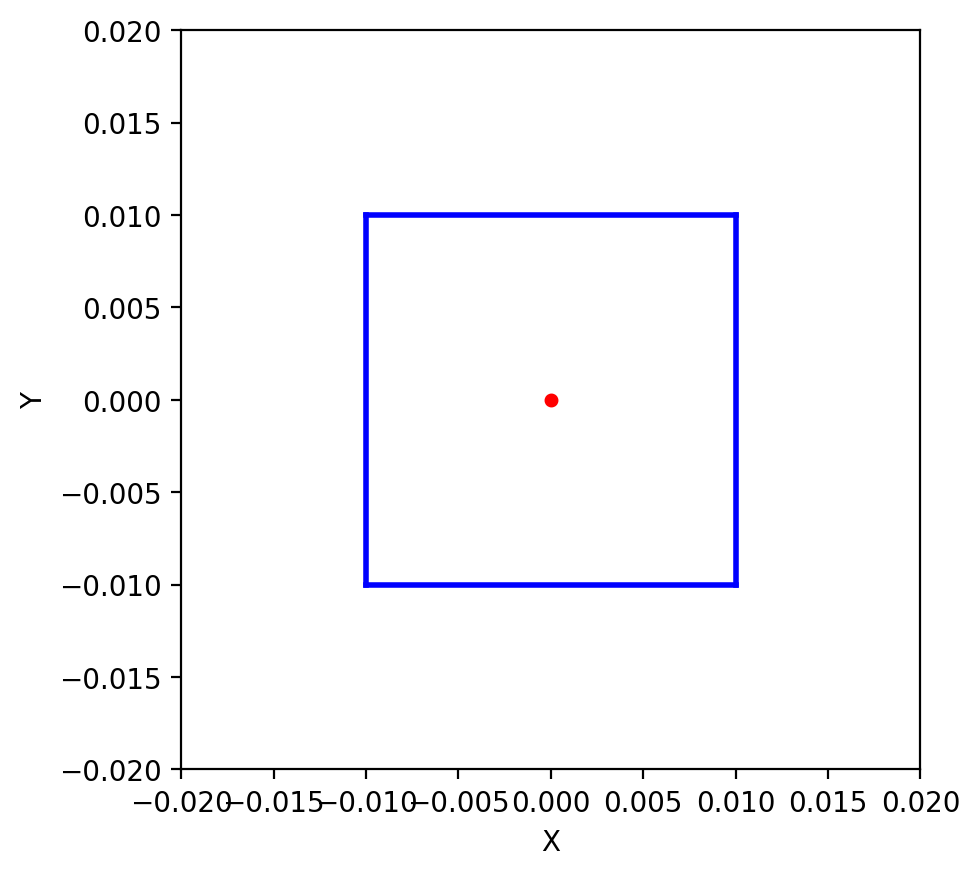

In [59]:
fig = plt.figure(dpi=200)
ax = plt.gca()

sim.plot2D(
    output_plane=mp.Volume(center=mp.Vector3(0,0,0), size=mp.Vector3(0.04, 0.04, 0)),
    # eps_parameters={'cmap': 'coolwarm', 'alpha': 0.8},   # 투명도와 컬러맵
    ax=ax
)

on time step 20000 (time=100), 0.215304 s/step
run 2 finished at t = 150.0 (30000 timesteps)
λ (μm)		net dipole power (W)
10.0000		-4.796522e-10
7.5000		6.837232e-09
6.0000		1.011756e-08
5.0000		1.616284e-08
4.2857		2.426462e-08
3.7500		3.302043e-08
3.3333		6.682274e-08
3.0000		1.354747e-07
2.7273		2.428658e-07
2.5000		4.152445e-07
2.3077		7.151854e-07
2.1429		1.227624e-06
2.0000		2.060598e-06
1.8750		3.384135e-06
1.7647		5.449109e-06
1.6667		8.611167e-06
1.5789		1.335783e-05
1.5000		2.036310e-05
1.4286		3.055463e-05
1.3636		4.516392e-05
1.3043		6.579229e-05
1.2500		9.449463e-05
1.2000		1.338760e-04
1.1538		1.871983e-04
1.1111		2.584737e-04
1.0714		3.525404e-04
1.0345		4.751355e-04
1.0000		6.329491e-04
0.9677		8.336360e-04
0.9375		1.085777e-03
0.9091		1.398777e-03
0.8824		1.782688e-03
0.8571		2.247967e-03
0.8333		2.805145e-03
0.8108		3.464409e-03
0.7895		4.235097e-03
0.7692		5.125126e-03
0.7500		6.140380e-03
0.7317		7.284088e-03
0.7143		8.556210e-03
0.6977		9.952885e-03
0.6818		1.14659

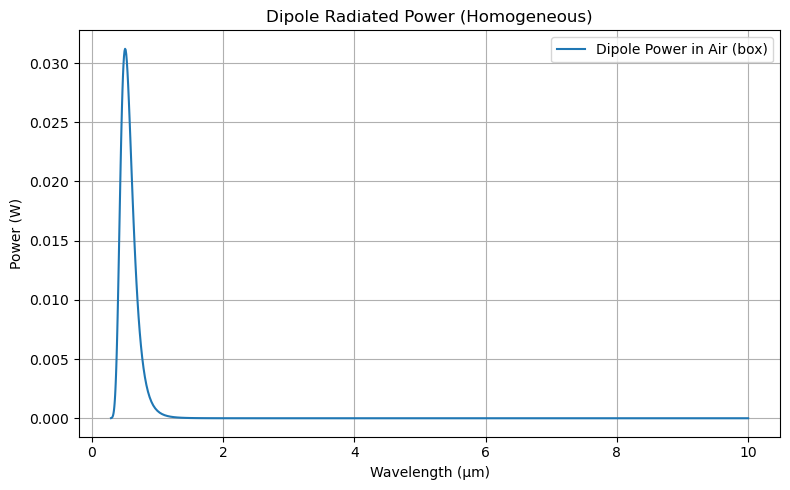

In [61]:
sim.init_sim()
# === 시뮬레이션 실행 ===
sim.run(until=50)
# sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ey, mp.Vector3(), 1e-8))

# === 측정된 flux 데이터 얻기 ===
flux_freqs = mp.get_flux_freqs(box_power)   # 측정된 주파수 배열 (1/μm)
net_power = mp.get_fluxes(box_power)        # 측정된 각 주파수의 dipole 방사 power (W)

# === 파장으로 변환 (μm)
wavelengths = 1 / np.array(flux_freqs)

# === 결과 출력 예시
print("λ (μm)\t\tnet dipole power (W)")
for i in range(nfreq):
    print(f"{wavelengths[i]:.4f}\t\t{net_power[i]:.6e}")

# === 시각화 (옵션)
plt.figure(figsize=(8,5))
plt.plot(wavelengths, net_power, label="Dipole Power in Air (box)", )
plt.xlabel("Wavelength (μm)")
plt.ylabel("Power (W)")
plt.title("Dipole Radiated Power (Homogeneous)")
# plt.ylim([-3, 14])
# plt.xlim([0.4,0.7])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


on time step 10000 (time=50), 0.00216498 s/step
run 1 finished at t = 100.0 (20000 timesteps)
0.031200680760447946
λ (μm)		net dipole power (W)
10.0000		-1.822281e-08
7.5000		-1.714658e-07
6.0000		-1.144812e-07
5.0000		5.155972e-07
4.2857		4.138252e-07
3.7500		1.160984e-07
3.3333		2.104078e-06
3.0000		4.969046e-06
2.7273		7.301221e-06
2.5000		1.322122e-05
2.3077		2.521098e-05
2.1429		4.109416e-05
2.0000		6.602359e-05
1.8750		1.111702e-04
1.7647		1.792277e-04
1.6667		2.763032e-04
1.5789		4.275801e-04
1.5000		6.568217e-04
1.4286		9.800218e-04
1.3636		1.440544e-03
1.3043		2.105789e-03
1.2500		3.029149e-03
1.2000		4.280070e-03
1.1538		5.986193e-03
1.1111		8.283346e-03
1.0714		1.129500e-02
1.0345		1.521159e-02
1.0000		2.028351e-02
0.9677		2.673124e-02
0.9375		3.479775e-02
0.9091		4.482856e-02
0.8824		5.716248e-02
0.8571		7.207373e-02
0.8333		8.990716e-02
0.8108		1.110553e-01
0.7895		1.357775e-01
0.7692		1.642697e-01
0.7500		1.967916e-01
0.7317		2.334800e-01
0.7143		2.742402e-01
0.6977		3.18

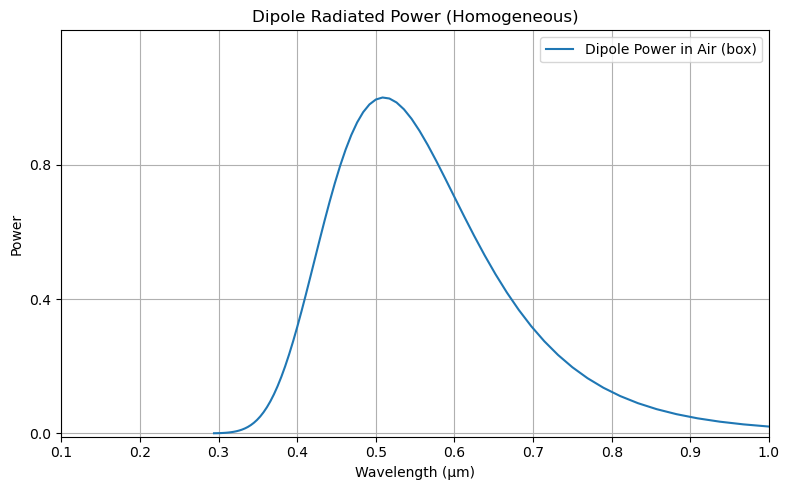

In [43]:
# === 시뮬레이션 실행 ===
sim.run(until=50)
# sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ey, mp.Vector3(), 1e-8))
# === 측정된 flux 데이터 얻기 ===
flux_freqs = mp.get_flux_freqs(box_power)   # 측정된 주파수 배열 (1/μm)
net_power = mp.get_fluxes(box_power)        # 측정된 각 주파수의 dipole 방사 power (W)
print(max(net_power))
net_power = [x/max(net_power) for x in net_power]
# === 파장으로 변환 (μm)
wavelengths = 1 / np.array(flux_freqs)
# === 결과 출력 예시
print("λ (μm)\t\tnet dipole power (W)")
for i in range(nfreq):
    print(f"{wavelengths[i]:.4f}\t\t{net_power[i]:.6e}")
# === 시각화 (옵션)
plt.figure(figsize=(8,5))
plt.plot(wavelengths, net_power, label="Dipole Power in Air (box)")
plt.xlabel("Wavelength (μm)")
plt.ylabel("Power")
plt.title("Dipole Radiated Power (Homogeneous)")
plt.xlim([0.1, 1.0])
plt.xticks(np.arange(0.1, 1.1, 0.1))
plt.ylim([-0.01, 1.2])
plt.yticks(np.arange(0, 1.2, 0.4))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [56]:
import csv

# 저장할 파일 경로
filename = "dipole_power.csv"

# CSV로 저장
with open(filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Wavelength (μm)", "Power (W)"])  # 헤더
    for wl, power in zip(wavelengths, net_power):
        writer.writerow([wl, power])

print(f"CSV 파일 저장 완료: {filename}")

CSV 파일 저장 완료: dipole_power.csv


-----------
Initializing structure...
time for choose_chunkdivision = 0.00117612 s
Working in 2D dimensions.
Computational cell is 1 x 1 x 0 with resolution 100
time for set_epsilon = 0.0128059 s
-----------
Meep progress: 156.275/200.0 = 78.1% done in 4.0s, 1.1s to go
on time step 31260 (time=156.3), 0.000127964 s/step
run 0 finished at t = 200.0 (40000 timesteps)
λ (μm)		net dipole power (W)
10.0000		-1.538803e-03
7.5000		-1.407346e-03
6.0000		-1.471398e-03
5.0000		-1.538247e-03
4.2857		-1.378748e-03
3.7500		-1.506432e-03
3.3333		-1.524585e-03
3.0000		-1.347012e-03
2.7273		-1.558640e-03
2.5000		-1.482619e-03
2.3077		-1.325523e-03
2.1429		-1.621246e-03
2.0000		-1.399248e-03
1.8750		-1.333060e-03
1.7647		-1.673168e-03
1.6667		-1.270665e-03
1.5789		-1.385523e-03
1.5000		-1.679897e-03
1.4286		-1.106700e-03
1.3636		-1.483459e-03
1.3043		-1.601129e-03
1.2500		-9.254432e-04
1.2000		-1.600984e-03
1.1538		-1.401780e-03
1.1111		-7.307179e-04
1.0714		-1.686163e-03
1.0345		-1.051526e-03
1.0000		

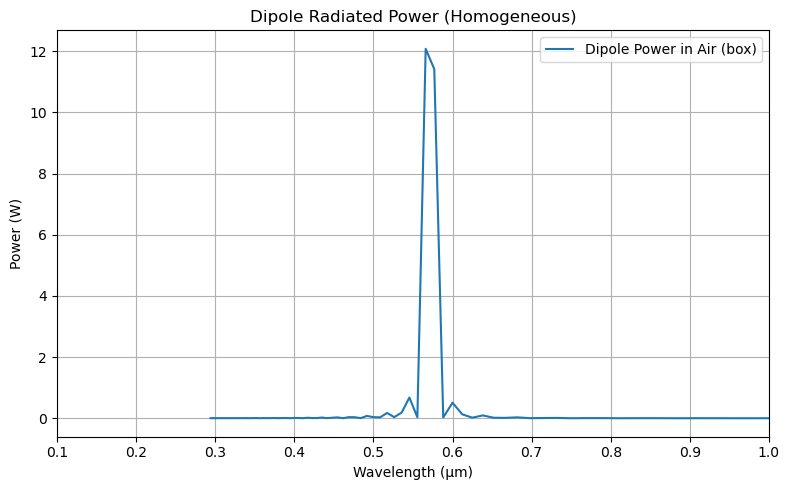

In [65]:
fcen = 1.75
df=3.3

source_center = mp.Vector3(0,0,0)
sources = [mp.Source(
    src=mp.ContinuousSource(frequency=fcen, fwidth=df),
    component=mp.Ey,
    center=source_center,
    size=mp.Vector3(0,0)
)]

sim = mp.Simulation(
    cell_size=cell_size,
    default_material=mp.Medium(index=1),
    boundary_layers=boundary_layer,
    sources=sources,
    resolution=resolution
)

offset = 0.01
flux_size = 0.02
source_center = mp.Vector3(0,0,0)

box_power = sim.add_flux(
    fcen, df, nfreq,
    mp.FluxRegion(center=source_center - mp.Vector3(offset, 0, 0),
                  size=mp.Vector3(0, flux_size),
                  # direction=mp.Y, 
                  weight=-1),
    mp.FluxRegion(center=source_center + mp.Vector3(offset, 0, 0),
                  size=mp.Vector3(0, flux_size),
                  # direction=mp.Y
                ),
    mp.FluxRegion(center=source_center - mp.Vector3(0, offset, 0),
                  size=mp.Vector3(flux_size, 0),
                  # direction=mp.Y, 
                  weight=-1),
    mp.FluxRegion(center=source_center + mp.Vector3(0, offset, 0),
                  size=mp.Vector3(flux_size, 0),
                  # direction=mp.Y
                  )
)

sim.init_sim()
# === 시뮬레이션 실행 ===
sim.run(until=200)
# sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ey, mp.Vector3(), 1e-8))

# === 측정된 flux 데이터 얻기 ===
flux_freqs = mp.get_flux_freqs(box_power)   # 측정된 주파수 배열 (1/μm)
net_power = mp.get_fluxes(box_power)        # 측정된 각 주파수의 dipole 방사 power (W)

# === 파장으로 변환 (μm)
wavelengths = 1 / np.array(flux_freqs)

# === 결과 출력 예시
print("λ (μm)\t\tnet dipole power (W)")
for i in range(nfreq):
    print(f"{wavelengths[i]:.4f}\t\t{net_power[i]:.6e}")

# === 시각화 (옵션)
plt.figure(figsize=(8,5))
plt.plot(wavelengths, net_power, label="Dipole Power in Air (box)", )
plt.xlabel("Wavelength (μm)")
plt.ylabel("Power (W)")
plt.title("Dipole Radiated Power (Homogeneous)")
# plt.ylim([-3, 14])
plt.xlim([0.1,1])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


-----------
Initializing structure...
time for choose_chunkdivision = 0.000193119 s
Working in 2D dimensions.
Computational cell is 4 x 4 x 0 with resolution 50
time for set_epsilon = 0.0563869 s
-----------
run 0 finished at t = 50.0 (5000 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000165939 s
Working in 2D dimensions.
Computational cell is 4 x 4 x 0 with resolution 50
time for set_epsilon = 0.0493009 s
-----------
run 0 finished at t = 50.0 (5000 timesteps)


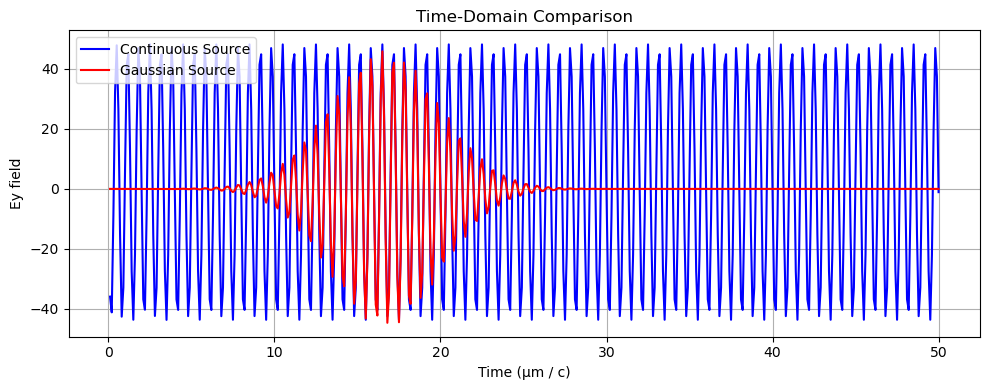

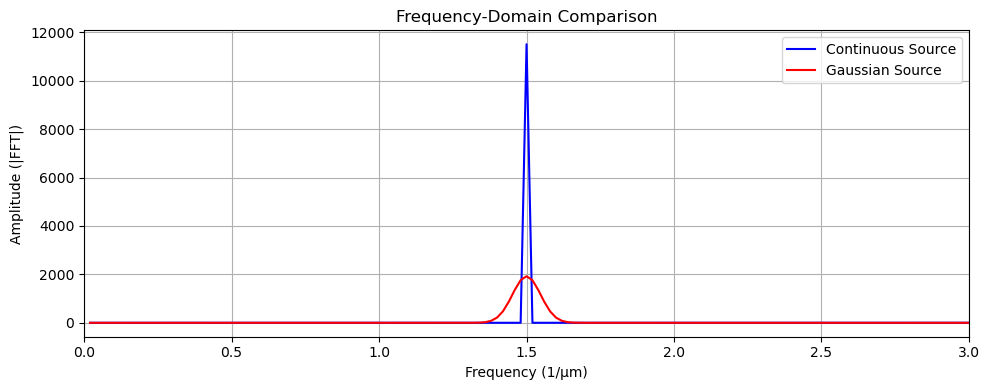

In [69]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 공통 시뮬레이션 설정
# -----------------------------
resolution = 50
cell_size = mp.Vector3(4, 4, 0)
pml_layers = [mp.PML(0.5)]
fcen = 1.5       # 중심 주파수 (1/μm)
fwidth = 0.3     # Gaussian 대역폭
until_time = 50  # 총 시간
dt = 0.1         # 샘플링 간격
src_comp = mp.Ey

# -----------------------------
# 데이터 저장용 리스트
# -----------------------------
t_list = []
ey_continuous = []
ey_gaussian = []

# -----------------------------
# 필드 샘플링 함수
# -----------------------------
def store_continuous(sim):
    t_list.append(sim.meep_time())
    ey_continuous.append(sim.get_field_point(src_comp, mp.Vector3()))

def store_gaussian(sim):
    ey_gaussian.append(sim.get_field_point(src_comp, mp.Vector3()))

# -----------------------------
# Continuous Source 시뮬레이션
# -----------------------------
sim1 = mp.Simulation(
    resolution=resolution,
    cell_size=cell_size,
    boundary_layers=pml_layers,
    default_material=mp.Medium(epsilon=1.0),
    sources=[mp.Source(
        src=mp.ContinuousSource(frequency=fcen),
        component=src_comp,
        center=mp.Vector3()
    )]
)

sim1.run(mp.at_every(dt, store_continuous), until=until_time)

# -----------------------------
# Gaussian Source 시뮬레이션
# -----------------------------
sim2 = mp.Simulation(
    resolution=resolution,
    cell_size=cell_size,
    boundary_layers=pml_layers,
    default_material=mp.Medium(epsilon=1.0),
    sources=[mp.Source(
        src=mp.GaussianSource(frequency=fcen, fwidth=fwidth),
        component=src_comp,
        center=mp.Vector3()
    )]
)

sim2.run(mp.at_every(dt, store_gaussian), until=until_time)

# -----------------------------
# 시간 파형 플롯
# -----------------------------
plt.figure(figsize=(10, 4))
plt.plot(t_list, ey_continuous, label="Continuous Source", color="blue")
plt.plot(t_list, ey_gaussian, label="Gaussian Source", color="red")
plt.xlabel("Time (μm / c)")
plt.ylabel("Ey field")
plt.title("Time-Domain Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------
# 주파수 도메인 분석 (FFT)
# -----------------------------
N = len(t_list)
fs = 1 / dt  # sampling rate
freqs = np.fft.fftfreq(N, d=dt)
fft_cont = np.abs(np.fft.fft(ey_continuous))
fft_gaus = np.abs(np.fft.fft(ey_gaussian))

# 양의 주파수만 시각화
mask = freqs > 0
freqs_pos = freqs[mask]
fft_cont_pos = fft_cont[mask]
fft_gaus_pos = fft_gaus[mask]

# -----------------------------
# 주파수 스펙트럼 플롯
# -----------------------------
plt.figure(figsize=(10, 4))
plt.plot(freqs_pos, fft_cont_pos, label="Continuous Source", color="blue")
plt.plot(freqs_pos, fft_gaus_pos, label="Gaussian Source", color="red")
plt.xlabel("Frequency (1/μm)")
plt.ylabel("Amplitude (|FFT|)")
plt.title("Frequency-Domain Comparison")
plt.xlim(0, 3)  # 주파수 범위 제한
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
